# ETL Notebook

While the aim is to use the API provided by SMARD, it is more convenient for the ETL process to use the CSV files provided by their website. Of course this cannot be automated later on and therefore cannot be part of the final solution.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extraction:
- downloading csv files for Market prices, installed genration capacity, real generation, real consumption for the time period 01/Jan/2021 till 31/Dec/2023
- read files into Pandas

<font color='red'>Abbreviations used for the files</font>
- Installed generation capacity : IGC
- real generated power : RGP
- real consumed power : RConP
- Market prices : MP

In [2]:
df_IGC = pd.read_csv('../Data/Installierte_Erzeugungsleistung_202101010000_202312312359_Jahr.csv', sep= ';', decimal=',', thousands='.')
df_RGP = pd.read_csv('../Data/Realisierte_Erzeugung_202101010000_202312312359_Viertelstunde.csv', sep= ';', decimal=',', thousands='.')
df_RConP = pd.read_csv('../Data/Realisierter_Stromverbrauch_202101010000_202312312359_Viertelstunde.csv', sep= ';', decimal=',', thousands='.')
df_MP = pd.read_csv('../Data/Gro_handelspreise_202101010000_202312312359_Stunde.csv', sep= ';', decimal=',', thousands='.')

In [3]:
df_IGC.head(10)

,Datum,Anfang,Ende,Biomasse [MW] Originalauflösungen,Wasserkraft [MW] Originalauflösungen,Wind Offshore [MW] Originalauflösungen,Wind Onshore [MW] Originalauflösungen,Photovoltaik [MW] Originalauflösungen,Sonstige Erneuerbare [MW] Originalauflösungen,Kernenergie [MW] Originalauflösungen,Braunkohle [MW] Originalauflösungen,Steinkohle [MW] Originalauflösungen,Erdgas [MW] Originalauflösungen,Pumpspeicher [MW] Originalauflösungen,Sonstige Konventionelle [MW] Originalauflösungen
0,1012021,00:00,00:00,8204,5112,7774,54345,50410,464,8114,20487,23499,31942,9422,7463
1,1012022,00:00,00:00,8332,4253,7787,55289,57744,403,4056,18544,18830,30553,9280,7244
2,1012023,00:00,00:00,8467,5148,8129,57590,63066,440,4056,17692,18127,31808,9280,8958


In [4]:
df_RGP.head(10)

,Datum,Anfang,Ende,Biomasse [MWh] Originalauflösungen,Wasserkraft [MWh] Originalauflösungen,Wind Offshore [MWh] Originalauflösungen,Wind Onshore [MWh] Originalauflösungen,Photovoltaik [MWh] Originalauflösungen,Sonstige Erneuerbare [MWh] Originalauflösungen,Kernenergie [MWh] Originalauflösungen,Braunkohle [MWh] Originalauflösungen,Steinkohle [MWh] Originalauflösungen,Erdgas [MWh] Originalauflösungen,Pumpspeicher [MWh] Originalauflösungen,Sonstige Konventionelle [MWh] Originalauflösungen
0,1012021,00:00,00:15,1152.25,308.25,85.00,1050.25,0.0,56.75,2034.25,2898.50,937.25,1401.50,72.75,410.50
1,1012021,00:15,00:30,1149.00,300.50,88.00,1019.25,0.0,56.75,2036.25,2904.50,872.00,1416.25,95.00,411.00
2,1012021,00:30,00:45,1148.25,298.50,101.25,946.75,0.0,56.75,2036.75,2904.25,829.25,1419.25,82.00,409.00
3,1012021,00:45,01:00,1147.75,297.75,108.75,918.25,0.0,56.75,2037.50,2901.25,805.25,1412.25,97.50,407.00
4,1012021,01:00,01:15,1145.75,310.25,105.75,923.25,0.0,56.75,2037.50,2911.00,785.00,1362.75,155.75,409.50
5,1012021,01:15,01:30,1145.00,297.00,103.00,901.75,0.0,56.75,2036.50,2898.25,758.75,1348.25,130.75,406.50
6,1012021,01:30,01:45,1145.50,294.50,95.25,871.25,0.0,56.75,2038.25,2898.00,744.25,1347.50,123.25,409.25
7,1012021,01:45,02:00,1148.00,294.50,90.50,845.25,0.0,56.75,2038.00,2895.50,756.75,1350.50,108.75,410.75
8,1012021,02:00,02:15,1146.00,293.50,80.00,830.75,0.0,56.75,2039.00,2908.25,776.25,1335.75,140.25,410.25
9,1012021,02:15,02:30,1145.50,289.75,76.00,817.50,0.0,56.75,2040.25,2910.00,769.75,1328.50,73.75,408.75


In [5]:
df_RConP.head(10)

,Datum,Anfang,Ende,Gesamt (Netzlast) [MWh] Originalauflösungen,Residuallast [MWh] Originalauflösungen,Pumpspeicher [MWh] Originalauflösungen
0,1012021,00:00,00:15,11245.75,10110.50,106.75
1,1012021,00:15,00:30,11192.75,10085.50,110.75
2,1012021,00:30,00:45,11103.25,10055.25,152.75
3,1012021,00:45,01:00,11044.25,10017.25,155.00
4,1012021,01:00,01:15,10879.25,9850.25,90.00
5,1012021,01:15,01:30,10749.50,9744.75,61.25
6,1012021,01:30,01:45,10623.50,9657.00,105.75
7,1012021,01:45,02:00,10580.00,9644.25,122.25
8,1012021,02:00,02:15,10399.50,9488.75,376.75
9,1012021,02:15,02:30,10303.50,9410.00,394.50


In [6]:
df_MP.head(10)

,Datum,Anfang,Ende,Deutschland/Luxemburg [€/MWh] Originalauflösungen,∅ Anrainer DE/LU [€/MWh] Originalauflösungen,Belgien [€/MWh] Originalauflösungen,Dänemark 1 [€/MWh] Originalauflösungen,Dänemark 2 [€/MWh] Originalauflösungen,Frankreich [€/MWh] Originalauflösungen,Niederlande [€/MWh] Originalauflösungen,Norwegen 2 [€/MWh] Originalauflösungen,Österreich [€/MWh] Originalauflösungen,Polen [€/MWh] Originalauflösungen,Schweden 4 [€/MWh] Originalauflösungen,Schweiz [€/MWh] Originalauflösungen,Tschechien [€/MWh] Originalauflösungen,DE/AT/LU [€/MWh] Originalauflösungen,Italien (Nord) [€/MWh] Originalauflösungen,Slowenien [€/MWh] Originalauflösungen,Ungarn [€/MWh] Originalauflösungen
0,1012021,00:00,01:00,50.87,44.17,50.87,50.87,50.87,50.87,50.87,24.95,50.87,34.18,24.95,50.98,45.54,-,50.87,50.87,45.54
1,1012021,01:00,02:00,48.19,41.63,48.19,48.19,48.19,48.19,48.19,24.35,48.19,32.61,24.35,45.94,41.59,-,48.19,48.19,41.59
2,1012021,02:00,03:00,44.68,39.38,44.68,44.68,44.68,44.68,44.68,23.98,44.68,32.58,23.98,44.53,40.05,-,44.68,44.68,40.05
3,1012021,03:00,04:00,42.92,37.73,42.92,42.92,42.92,42.92,42.92,23.72,42.92,32.20,23.72,41.01,36.90,-,42.92,42.92,36.90
4,1012021,04:00,05:00,40.39,35.70,40.39,40.39,40.39,40.39,40.39,23.73,40.39,29.16,23.73,39.23,34.47,-,40.39,40.39,34.47
5,1012021,05:00,06:00,40.20,35.37,40.20,40.20,40.20,40.20,40.20,24.06,40.20,28.46,24.06,38.43,32.82,-,40.20,40.20,32.82
6,1012021,06:00,07:00,39.63,35.00,39.63,39.63,39.63,39.63,39.63,24.44,39.63,28.11,24.44,39.57,30.71,-,39.63,39.63,27.70
7,1012021,07:00,08:00,40.09,34.06,40.09,40.09,40.09,40.09,40.09,24.93,40.09,28.46,24.93,40.78,15.00,-,40.09,5.91,15.00
8,1012021,08:00,09:00,41.27,34.28,41.27,41.27,41.27,41.27,41.27,24.90,41.27,28.46,24.90,42.72,8.43,-,41.27,41.27,8.43
9,1012021,09:00,10:00,44.88,38.23,44.88,44.88,44.88,44.88,44.88,25.07,44.88,30.62,25.07,44.32,26.20,-,41.67,41.67,20.77


### Transformation
Now Extraction was easy for csv files. Pretty straight forward. Now the time has come to check, if the data needs some wrangling and we needto transform it quite a bit
- Check shapes and if there are any missing values or invalid values
- convert columns, so they can be better used later on
- cleanse the column header, to be more concise
- and so on, you get the idea

In [7]:
print('Shapes:')
print('IGC: ', df_IGC.shape)
print('IGC: ', df_RGP.shape)
print('IGC: ', df_RConP.shape)
print('IGC: ', df_MP.shape)

Shapes:
IGC:  (3, 15)
IGC:  (105120, 15)
IGC:  (105120, 6)
IGC:  (26280, 20)


In [8]:
df_IGC.nunique()

Datum                                               3
Anfang                                              1
Ende                                                1
Biomasse [MW] Originalauflösungen                   3
Wasserkraft [MW] Originalauflösungen                3
Wind Offshore [MW] Originalauflösungen              3
Wind Onshore [MW] Originalauflösungen               3
Photovoltaik [MW] Originalauflösungen               3
Sonstige Erneuerbare [MW] Originalauflösungen       3
Kernenergie [MW] Originalauflösungen                2
Braunkohle [MW] Originalauflösungen                 3
Steinkohle [MW] Originalauflösungen                 3
Erdgas [MW] Originalauflösungen                     3
Pumpspeicher [MW] Originalauflösungen               2
Sonstige Konventionelle [MW] Originalauflösungen    3
dtype: int64

In [9]:
df_IGC.isna().any()

Datum                                               False
Anfang                                              False
Ende                                                False
Biomasse [MW] Originalauflösungen                   False
Wasserkraft [MW] Originalauflösungen                False
Wind Offshore [MW] Originalauflösungen              False
Wind Onshore [MW] Originalauflösungen               False
Photovoltaik [MW] Originalauflösungen               False
Sonstige Erneuerbare [MW] Originalauflösungen       False
Kernenergie [MW] Originalauflösungen                False
Braunkohle [MW] Originalauflösungen                 False
Steinkohle [MW] Originalauflösungen                 False
Erdgas [MW] Originalauflösungen                     False
Pumpspeicher [MW] Originalauflösungen               False
Sonstige Konventionelle [MW] Originalauflösungen    False
dtype: bool

In [10]:
df_IGC.isnull().any()

Datum                                               False
Anfang                                              False
Ende                                                False
Biomasse [MW] Originalauflösungen                   False
Wasserkraft [MW] Originalauflösungen                False
Wind Offshore [MW] Originalauflösungen              False
Wind Onshore [MW] Originalauflösungen               False
Photovoltaik [MW] Originalauflösungen               False
Sonstige Erneuerbare [MW] Originalauflösungen       False
Kernenergie [MW] Originalauflösungen                False
Braunkohle [MW] Originalauflösungen                 False
Steinkohle [MW] Originalauflösungen                 False
Erdgas [MW] Originalauflösungen                     False
Pumpspeicher [MW] Originalauflösungen               False
Sonstige Konventionelle [MW] Originalauflösungen    False
dtype: bool

In [11]:
print(df_RGP.nunique(), '\n', '\n',df_RGP.isna().any(), '\n','\n',df_RGP.isnull().any())

Datum                                                 1095
Anfang                                                  96
Ende                                                    96
Biomasse [MWh] Originalauflösungen                    1503
Wasserkraft [MWh] Originalauflösungen                 1799
Wind Offshore [MWh] Originalauflösungen               7007
Wind Onshore [MWh] Originalauflösungen               31537
Photovoltaik [MWh] Originalauflösungen               24803
Sonstige Erneuerbare [MWh] Originalauflösungen         165
Kernenergie [MWh] Originalauflösungen                 4386
Braunkohle [MWh] Originalauflösungen                 13412
Steinkohle [MWh] Originalauflösungen                 13709
Erdgas [MWh] Originalauflösungen                     12108
Pumpspeicher [MWh] Originalauflösungen                6924
Sonstige Konventionelle [MWh] Originalauflösungen     1281
dtype: int64 
 
 Datum                                                False
Anfang                                 

In [12]:
print(df_RConP.nunique(), '\n', '\n',df_RConP.isna().any(), '\n','\n',df_RConP.isnull().any())

Datum                                           1095
Anfang                                            96
Ende                                              96
Gesamt (Netzlast) [MWh] Originalauflösungen    35982
Residuallast [MWh] Originalauflösungen         45735
Pumpspeicher [MWh] Originalauflösungen          7349
dtype: int64 
 
 Datum                                          False
Anfang                                         False
Ende                                           False
Gesamt (Netzlast) [MWh] Originalauflösungen    False
Residuallast [MWh] Originalauflösungen         False
Pumpspeicher [MWh] Originalauflösungen         False
dtype: bool 
 
 Datum                                          False
Anfang                                         False
Ende                                           False
Gesamt (Netzlast) [MWh] Originalauflösungen    False
Residuallast [MWh] Originalauflösungen         False
Pumpspeicher [MWh] Originalauflösungen         False
dtype: bool


In [13]:
print(df_RConP.nunique(), '\n', '\n',df_RConP.isna().any(), '\n','\n',df_RConP.isnull().any())

Datum                                           1095
Anfang                                            96
Ende                                              96
Gesamt (Netzlast) [MWh] Originalauflösungen    35982
Residuallast [MWh] Originalauflösungen         45735
Pumpspeicher [MWh] Originalauflösungen          7349
dtype: int64 
 
 Datum                                          False
Anfang                                         False
Ende                                           False
Gesamt (Netzlast) [MWh] Originalauflösungen    False
Residuallast [MWh] Originalauflösungen         False
Pumpspeicher [MWh] Originalauflösungen         False
dtype: bool 
 
 Datum                                          False
Anfang                                         False
Ende                                           False
Gesamt (Netzlast) [MWh] Originalauflösungen    False
Residuallast [MWh] Originalauflösungen         False
Pumpspeicher [MWh] Originalauflösungen         False
dtype: bool


In [14]:
print(df_MP.nunique(), '\n', '\n',df_MP.isna().any(), '\n','\n',df_MP.isnull().any())

Datum                                                 1095
Anfang                                                  24
Ende                                                    24
Deutschland/Luxemburg [€/MWh] Originalauflösungen    16194
∅ Anrainer DE/LU [€/MWh] Originalauflösungen         16626
Belgien [€/MWh] Originalauflösungen                  16469
Dänemark 1 [€/MWh] Originalauflösungen               15973
Dänemark 2 [€/MWh] Originalauflösungen               16076
Frankreich [€/MWh] Originalauflösungen               16600
Niederlande [€/MWh] Originalauflösungen              15078
Norwegen 2 [€/MWh] Originalauflösungen               15363
Österreich [€/MWh] Originalauflösungen               15919
Polen [€/MWh] Originalauflösungen                    13914
Schweden 4 [€/MWh] Originalauflösungen               14952
Schweiz [€/MWh] Originalauflösungen                  17562
Tschechien [€/MWh] Originalauflösungen               16085
DE/AT/LU [€/MWh] Originalauflösungen                    

So far, there are no missing values. Let's see what kind of date type the columns are.

In [15]:
print('dtypes')
print('df_IGC')
print(df_IGC.dtypes)
print('df_RGP')
print(df_RGP.dtypes)
print('df_RConP')
print(df_RConP.dtypes)
print('df_MP')
print(df_MP.dtypes)

dtypes
df_IGC
Datum                                                int64
Anfang                                              object
Ende                                                object
Biomasse [MW] Originalauflösungen                    int64
Wasserkraft [MW] Originalauflösungen                 int64
Wind Offshore [MW] Originalauflösungen               int64
Wind Onshore [MW] Originalauflösungen                int64
Photovoltaik [MW] Originalauflösungen                int64
Sonstige Erneuerbare [MW] Originalauflösungen        int64
Kernenergie [MW] Originalauflösungen                 int64
Braunkohle [MW] Originalauflösungen                  int64
Steinkohle [MW] Originalauflösungen                  int64
Erdgas [MW] Originalauflösungen                      int64
Pumpspeicher [MW] Originalauflösungen                int64
Sonstige Konventionelle [MW] Originalauflösungen     int64
dtype: object
df_RGP
Datum                                                  int64
Anfang             

For some reason most of the data is object. That needs to be changed. \
Also, there is an integer within the df_IGC columen. \
Also the first 3 columns can be replaced by a singel datetime element. In the case of IGC it's a bit tricky, as the granularity of the data is yearly.

In [16]:
headers_IGC = list(df_IGC)

In [17]:
print(headers_IGC)

['Datum', 'Anfang', 'Ende', 'Biomasse [MW] Originalauflösungen', 'Wasserkraft [MW] Originalauflösungen', 'Wind Offshore [MW] Originalauflösungen', 'Wind Onshore [MW] Originalauflösungen', 'Photovoltaik [MW] Originalauflösungen', 'Sonstige Erneuerbare [MW] Originalauflösungen', 'Kernenergie [MW] Originalauflösungen', 'Braunkohle [MW] Originalauflösungen', 'Steinkohle [MW] Originalauflösungen', 'Erdgas [MW] Originalauflösungen', 'Pumpspeicher [MW] Originalauflösungen', 'Sonstige Konventionelle [MW] Originalauflösungen']


In [18]:
map_IGC = ['Date', 'Begin', 'End', 'Biomass [MW]', 'Hydro [MW]', 'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaik [MW]', 'Misc Renewable [MW]', 'Nuclear [MW]', 'Brown Coal [MW]', 'Black Coal [MW]', 'Natural Gas [MW]', 'Pumped-storage [MW]', 'Misc conventional [MW]']

In [19]:
mapper = dict(zip(headers_IGC, map_IGC))

In [20]:
df_IGC.rename(columns=mapper, inplace=True)


In [21]:
headers_RGP = list(df_RGP)
headers_RConP = list(df_RConP)
headers_MP = list(df_MP)
print(headers_RGP)
print(headers_RConP)
print(headers_MP)

['Datum', 'Anfang', 'Ende', 'Biomasse [MWh] Originalauflösungen', 'Wasserkraft [MWh] Originalauflösungen', 'Wind Offshore [MWh] Originalauflösungen', 'Wind Onshore [MWh] Originalauflösungen', 'Photovoltaik [MWh] Originalauflösungen', 'Sonstige Erneuerbare [MWh] Originalauflösungen', 'Kernenergie [MWh] Originalauflösungen', 'Braunkohle [MWh] Originalauflösungen', 'Steinkohle [MWh] Originalauflösungen', 'Erdgas [MWh] Originalauflösungen', 'Pumpspeicher [MWh] Originalauflösungen', 'Sonstige Konventionelle [MWh] Originalauflösungen']
['Datum', 'Anfang', 'Ende', 'Gesamt (Netzlast) [MWh] Originalauflösungen', 'Residuallast [MWh] Originalauflösungen', 'Pumpspeicher [MWh] Originalauflösungen']
['Datum', 'Anfang', 'Ende', 'Deutschland/Luxemburg [€/MWh] Originalauflösungen', '∅ Anrainer DE/LU [€/MWh] Originalauflösungen', 'Belgien [€/MWh] Originalauflösungen', 'Dänemark 1 [€/MWh] Originalauflösungen', 'Dänemark 2 [€/MWh] Originalauflösungen', 'Frankreich [€/MWh] Originalauflösungen', 'Niederland

In [22]:
map_RGP = ['Date', 'Begin', 'End', 'Biomass [MWh]', 'Hydro [MWh]', 'Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Misc Renewable [MWh]', 'Nuclear [MWh]', 'Brown Coal [MWh]', 'Black Coal [MWh]', 'Natural Gas [MWh]', 'Pumped-storage [MWh]', 'Misc conventional [MWh]']
map_RConP = ['Date', 'Begin', 'End', 'Total (Grid Load) [MWh]', 'Residuallast [MWh]', 'Pumpspeicher [MWh]']
map_MP = ['Date', 'Begin', 'End', 'Germany/Luxemburg [€/MWh]', 'Avg Neighbours DE/LU [€/MWh]', 'Belgium [€/MWh]', 'Denmark 1 [€/MWh]', 'Denmark 2 [€/MWh]', 'France [€/MWh]', 'Netherlands [€/MWh]', 'Norway 2 [€/MWh]', 'Austria [€/MWh]', 'Poland [€/MWh]', 'Sweden 4 [€/MWh]', 'Swiss [€/MWh]', 'Czech Rep [€/MWh]', 'DE/AT/LU [€/MWh]', 'Italy (North) [€/MWh]', 'Slowenia [€/MWh]', 'Hungary [€/MWh]']

In [23]:
mapper = dict(zip(headers_RGP, map_RGP))
df_RGP.rename(columns=mapper, inplace=True)
mapper = dict(zip(headers_RConP, map_RConP))
df_RConP.rename(columns=mapper, inplace=True)
mapper = dict(zip(headers_MP, map_MP))
df_MP.rename(columns=mapper, inplace=True)

In [24]:
# time to delete some useless variable to release RAM
del mapper, map_IGC, map_MP, map_RConP, map_RGP, headers_IGC, headers_RGP, headers_RConP, headers_MP

In [52]:
df_RGP_2 = df_RGP
df_RGP_2['Date'] = df_RGP_2['Date'].astype(str)
df_RGP_2['Date'] = df_RGP_2['Date'].apply('{:0>8}'.format)
df_RGP_2['Timestamp'] = pd.to_datetime(df_RGP.apply(lambda x: x['Date'] + x['Begin'],axis=1), format= '%d%m%Y%H:%M')

In [53]:
df_RGP_2.insert(0, 'Timestamp', df_RGP_2.pop('Timestamp'))

In [54]:
df_RGP_2['Timestamp'] = df_RGP_2['Timestamp'] + pd.Timedelta(minutes=15)

In [55]:
df_RGP_2.drop(columns=['Date', 'Begin', 'End'], inplace=True)
df_RGP_2.tail()

,Timestamp,Biomass [MWh],Hydro [MWh],Wind Offshore [MWh],Wind Onshore [MWh],Photovoltaik [MWh],Misc Renewable [MWh],Nuclear [MWh],Brown Coal [MWh],Black Coal [MWh],Natural Gas [MWh],Pumped-storage [MWh],Misc conventional [MWh]
105115,2023-12-31 23:00:00,1068.25,408.25,1546.25,7527.25,0.0,24.0,0.0,842.50,488.25,658.50,143.75,343.0
105116,2023-12-31 23:15:00,1057.25,423.25,1515.50,7535.00,0.0,24.0,0.0,842.50,480.50,668.75,281.50,345.5
105117,2023-12-31 23:30:00,1055.75,419.25,1499.75,7495.00,0.0,24.0,0.0,852.25,446.00,676.75,137.50,349.0
105118,2023-12-31 23:45:00,1053.25,412.50,1479.25,7544.25,0.0,24.0,0.0,845.25,444.50,683.00,122.75,348.5
105119,2024-01-01 00:00:00,1051.50,404.00,1469.00,7480.50,0.0,24.0,0.0,840.75,442.25,679.00,58.25,348.0


In [56]:
df_RConP_2 = df_RConP
df_RConP_2['Date'] = df_RConP_2['Date'].astype(str).apply('{:0>8}'.format)
df_RConP_2['Timestamp'] = pd.to_datetime(df_RConP_2.apply(lambda x: x['Date'] + x['Begin'],axis=1), format= '%d%m%Y%H:%M')
df_RConP_2.insert(0, 'Timestamp', df_RConP_2.pop('Timestamp'))
df_RConP_2['Timestamp'] = df_RConP_2['Timestamp'] + pd.Timedelta(minutes=15)
df_RConP_2.drop(columns=['Date', 'Begin', 'End'], inplace=True)
df_RConP_2.tail()

,Timestamp,Total (Grid Load) [MWh],Residuallast [MWh],Pumpspeicher [MWh]
105115,2023-12-31 23:00:00,10543.50,1470.00,339.75
105116,2023-12-31 23:15:00,10544.75,1494.25,393.00
105117,2023-12-31 23:30:00,10425.25,1430.50,464.75
105118,2023-12-31 23:45:00,10363.50,1340.00,470.00
105119,2024-01-01 00:00:00,10144.50,1195.00,528.00


In [57]:
df_MP_2 = df_MP
df_MP_2['Date'] = df_MP_2['Date'].astype(str).apply('{:0>8}'.format)
df_MP_2['Timestamp'] = pd.to_datetime(df_MP_2.apply(lambda x: x['Date'] + x['Begin'],axis=1), format= '%d%m%Y%H:%M')
df_MP_2.insert(0, 'Timestamp', df_MP_2.pop('Timestamp'))
df_MP_2['Timestamp'] = df_MP_2['Timestamp'] + pd.Timedelta(hours=1)
df_MP_2.drop(columns=['Date', 'Begin', 'End'], inplace=True)
df_MP_2.tail()

,Timestamp,Germany/Luxemburg [€/MWh],Avg Neighbours DE/LU [€/MWh],Belgium [€/MWh],Denmark 1 [€/MWh],Denmark 2 [€/MWh],France [€/MWh],Netherlands [€/MWh],Norway 2 [€/MWh],Austria [€/MWh],Poland [€/MWh],Sweden 4 [€/MWh],Swiss [€/MWh],Czech Rep [€/MWh],DE/AT/LU [€/MWh],Italy (North) [€/MWh],Slowenia [€/MWh],Hungary [€/MWh]
26275,2023-12-31 20:00:00,9.00,33.20,20.26,39.64,39.64,17.75,39.64,62.88,19.57,46.06,39.64,23.40,16.69,-,136.07,21.49,25.05
26276,2023-12-31 21:00:00,7.95,29.60,19.65,34.89,34.89,16.43,34.89,62.60,17.20,35.01,34.89,20.65,14.47,-,130.00,19.19,23.33
26277,2023-12-31 22:00:00,6.00,22.61,9.00,29.60,29.60,8.16,13.30,62.25,8.20,41.92,29.60,9.58,7.52,-,117.23,8.71,9.82
26278,2023-12-31 23:00:00,10.68,24.20,10.68,28.67,28.67,10.68,10.68,61.77,10.68,48.27,28.67,16.78,10.68,-,108.96,10.68,10.68
26279,2024-01-01 00:00:00,2.44,19.26,3.17,26.87,26.87,3.64,3.17,59.31,9.35,35.70,26.87,9.51,7.44,-,106.12,11.02,14.95


In [58]:
df_IGC_2 = df_IGC
df_IGC_2['Date'] = df_IGC_2['Date'].astype(str).apply('{:0>8}'.format)
df_IGC_2['Timestamp'] = pd.to_datetime(df_IGC['Date'], format= '%d%m%Y')
df_IGC_2.insert(0, 'Timestamp', df_IGC_2.pop('Timestamp'))
df_IGC_2.drop(columns=['Date', 'Begin', 'End'], inplace=True)
df_IGC_2.head()

,Timestamp,Biomass [MW],Hydro [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaik [MW],Misc Renewable [MW],Nuclear [MW],Brown Coal [MW],Black Coal [MW],Natural Gas [MW],Pumped-storage [MW],Misc conventional [MW]
0,2021-01-01,8204,5112,7774,54345,50410,464,8114,20487,23499,31942,9422,7463
1,2022-01-01,8332,4253,7787,55289,57744,403,4056,18544,18830,30553,9280,7244
2,2023-01-01,8467,5148,8129,57590,63066,440,4056,17692,18127,31808,9280,8958


In [64]:
df_IGC_2.dtypes

Timestamp                 datetime64[ns]
Biomass [MW]                       int64
Hydro [MW]                         int64
Wind Offshore [MW]                 int64
Wind Onshore [MW]                  int64
Photovoltaik [MW]                  int64
Misc Renewable [MW]                int64
Nuclear [MW]                       int64
Brown Coal [MW]                    int64
Black Coal [MW]                    int64
Natural Gas [MW]                   int64
Pumped-storage [MW]                int64
Misc conventional [MW]             int64
dtype: object

In [60]:
df_RGP_2.dtypes

Timestamp                  datetime64[ns]
Biomass [MWh]                     float64
Hydro [MWh]                       float64
Wind Offshore [MWh]               float64
Wind Onshore [MWh]                float64
Photovoltaik [MWh]                float64
Misc Renewable [MWh]              float64
Nuclear [MWh]                     float64
Brown Coal [MWh]                  float64
Black Coal [MWh]                  float64
Natural Gas [MWh]                 float64
Pumped-storage [MWh]              float64
Misc conventional [MWh]           float64
dtype: object

In [61]:
df_RConP_2.dtypes

Timestamp                  datetime64[ns]
Total (Grid Load) [MWh]           float64
Residuallast [MWh]                float64
Pumpspeicher [MWh]                float64
dtype: object

In [62]:
df_MP_2.dtypes

Timestamp                       datetime64[ns]
Germany/Luxemburg [€/MWh]              float64
Avg Neighbours DE/LU [€/MWh]           float64
Belgium [€/MWh]                        float64
Denmark 1 [€/MWh]                      float64
Denmark 2 [€/MWh]                      float64
France [€/MWh]                         float64
Netherlands [€/MWh]                    float64
Norway 2 [€/MWh]                       float64
Austria [€/MWh]                        float64
Poland [€/MWh]                         float64
Sweden 4 [€/MWh]                       float64
Swiss [€/MWh]                          float64
Czech Rep [€/MWh]                      float64
DE/AT/LU [€/MWh]                        object
Italy (North) [€/MWh]                  float64
Slowenia [€/MWh]                       float64
Hungary [€/MWh]                        float64
dtype: object

According to the documentation the DE/AT/Lu isn't considered after 2018. That's why there are no numerals in this column. --> deleted

In [63]:
df_MP_2.drop(columns='DE/AT/LU [€/MWh]', inplace=True)

In [65]:
df_IGC_2.describe()

,Timestamp,Biomass [MW],Hydro [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaik [MW],Misc Renewable [MW],Nuclear [MW],Brown Coal [MW],Black Coal [MW],Natural Gas [MW],Pumped-storage [MW],Misc conventional [MW]
count,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2022-01-01 00:00:00,8334.333333,4837.666667,7896.666667,55741.333333,57073.333333,435.666667,5408.666667,18907.666667,20152.000000,31434.333333,9327.333333,7888.333333
min,2021-01-01 00:00:00,8204.000000,4253.000000,7774.000000,54345.000000,50410.000000,403.000000,4056.000000,17692.000000,18127.000000,30553.000000,9280.000000,7244.000000
25%,2021-07-02 12:00:00,8268.000000,4682.500000,7780.500000,54817.000000,54077.000000,421.500000,4056.000000,18118.000000,18478.500000,31180.500000,9280.000000,7353.500000
50%,2022-01-01 00:00:00,8332.000000,5112.000000,7787.000000,55289.000000,57744.000000,440.000000,4056.000000,18544.000000,18830.000000,31808.000000,9280.000000,7463.000000
75%,2022-07-02 12:00:00,8399.500000,5130.000000,7958.000000,56439.500000,60405.000000,452.000000,6085.000000,19515.500000,21164.500000,31875.000000,9351.000000,8210.500000
max,2023-01-01 00:00:00,8467.000000,5148.000000,8129.000000,57590.000000,63066.000000,464.000000,8114.000000,20487.000000,23499.000000,31942.000000,9422.000000,8958.000000
std,NaN,131.515525,506.656031,201.311533,1669.119628,6354.599069,30.730007,2342.887392,1432.548894,2919.821741,766.192099,81.983738,932.807769


In [66]:
df_RGP_2.describe()

,Timestamp,Biomass [MWh],Hydro [MWh],Wind Offshore [MWh],Wind Onshore [MWh],Photovoltaik [MWh],Misc Renewable [MWh],Nuclear [MWh],Brown Coal [MWh],Black Coal [MWh],Natural Gas [MWh],Pumped-storage [MWh],Misc conventional [MWh]
count,105120,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,2022-07-02 12:43:10.273972480,1110.686867,392.486891,687.576969,2937.223984,1494.884225,37.422213,998.584430,2659.549814,1469.574189,1338.701339,289.898687,344.421437
min,2021-01-01 00:15:00,892.000000,209.500000,0.000000,23.750000,0.000000,12.500000,0.000000,634.250000,170.250000,280.500000,0.000000,201.750000
25%,2021-10-01 19:11:15,1060.000000,315.250000,248.500000,1056.000000,0.000000,28.750000,534.500000,2050.000000,702.750000,782.750000,32.000000,318.250000
50%,2022-07-02 13:07:30,1115.000000,373.500000,626.250000,2174.375000,25.250000,35.750000,991.000000,2899.500000,1333.500000,1173.250000,107.750000,348.000000
75%,2023-04-02 07:03:45,1161.250000,463.250000,1104.250000,4268.750000,2397.750000,44.500000,1685.250000,3297.000000,2081.250000,1774.750000,419.750000,371.750000
max,2024-01-01 00:00:00,1293.250000,685.000000,1910.000000,12039.500000,10213.500000,58.750000,2052.000000,4157.250000,3964.250000,4169.250000,2399.000000,577.000000
std,NaN,68.349389,95.278656,479.691194,2410.031368,2306.841071,9.490568,716.913513,848.491709,872.564804,704.340351,381.077043,45.223106


In [67]:
df_RConP_2.describe()

,Timestamp,Total (Grid Load) [MWh],Residuallast [MWh],Pumpspeicher [MWh]
count,105120,105120.000000,105120.000000,105120.000000
mean,2022-07-02 12:43:10.273972480,13744.617119,8624.931940,378.132144
min,2021-01-01 00:15:00,6984.750000,-1545.000000,0.000000
25%,2021-10-01 19:11:15,11795.000000,6359.687500,26.500000
50%,2022-07-02 13:07:30,13733.500000,8743.250000,172.000000
75%,2023-04-02 07:03:45,15632.312500,10941.250000,615.000000
max,2024-01-01 00:00:00,20341.500000,17855.750000,2188.250000
std,NaN,2413.460632,3327.428825,450.909401


In [68]:
df_MP_2.describe()

,Timestamp,Germany/Luxemburg [€/MWh],Avg Neighbours DE/LU [€/MWh],Belgium [€/MWh],Denmark 1 [€/MWh],Denmark 2 [€/MWh],France [€/MWh],Netherlands [€/MWh],Norway 2 [€/MWh],Austria [€/MWh],Poland [€/MWh],Sweden 4 [€/MWh],Swiss [€/MWh],Czech Rep [€/MWh],Italy (North) [€/MWh],Slowenia [€/MWh],Hungary [€/MWh]
count,26280,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.00000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2022-07-02 13:05:40.273972736,142.490504,139.209164,148.640455,131.333860,126.439373,160.63522,146.901516,121.940374,156.796919,121.800676,99.165318,168.020082,149.627110,186.930579,164.611566,164.109904
min,2021-01-01 01:00:00,-500.000000,-152.180000,-120.000000,-440.100000,-60.040000,-134.94000,-500.000000,-61.840000,-500.000000,-13.810000,-60.040000,-142.880000,-68.540000,3.000000,-500.000000,-500.000000
25%,2021-10-01 19:45:00,70.100000,71.810000,73.080000,61.167500,51.307500,75.23000,74.487500,58.427500,78.307500,80.780000,32.867500,82.710000,76.120000,100.000000,82.077500,81.090000
50%,2022-07-02 13:30:00,105.640000,107.335000,112.815000,98.525000,93.685000,118.04500,113.000000,93.365000,119.880000,108.110000,71.180000,128.660000,111.885000,146.505000,126.435000,127.115000
75%,2023-04-02 07:15:00,183.000000,174.665000,196.342500,163.692500,161.675000,211.81000,193.945000,148.942500,200.000000,146.942500,127.115000,221.492500,190.000000,234.990000,213.027500,211.565000
max,2024-01-01 00:00:00,871.000000,819.360000,871.000000,871.000000,871.000000,2987.78000,871.000000,844.000000,919.640000,771.000000,799.970000,871.610000,871.000000,871.000000,879.290000,1047.100000
std,NaN,116.973716,104.129219,115.994162,114.413627,115.759555,129.67049,113.808035,102.248448,120.534174,66.552213,101.138697,121.809512,115.937836,127.472765,122.889491,123.341571


In [82]:
df_RGP_2['Timestamp'].duplicated().sum()

12

In [83]:
df_RGP_2[df_RGP_2['Timestamp'].duplicated(keep=False)].sort_values(by='Timestamp').head(30)

,Timestamp,Biomass [MWh],Hydro [MWh],Wind Offshore [MWh],Wind Onshore [MWh],Photovoltaik [MWh],Misc Renewable [MWh],Nuclear [MWh],Brown Coal [MWh],Black Coal [MWh],Natural Gas [MWh],Pumped-storage [MWh],Misc conventional [MWh]
29092,2021-10-31 02:15:00,1106.25,231.75,676.75,4317.00,0.0,39.25,1832.25,2324.75,611.25,540.50,5.00,285.25
29096,2021-10-31 02:15:00,1107.25,226.50,634.25,3946.00,0.0,39.25,1811.25,2245.00,507.75,523.50,1.75,287.25
29093,2021-10-31 02:30:00,1104.50,228.25,676.50,4225.75,0.0,39.25,1809.00,2304.75,567.25,541.25,1.00,285.50
29097,2021-10-31 02:30:00,1110.00,245.75,632.00,3784.50,0.0,39.25,1809.50,2221.50,499.50,552.50,3.75,290.25
29094,2021-10-31 02:45:00,1107.50,233.25,646.00,4182.50,0.0,39.25,1809.50,2323.25,525.50,542.75,3.50,284.25
29098,2021-10-31 02:45:00,1110.00,263.25,642.75,3743.25,0.0,39.25,1812.75,2219.00,503.00,531.25,0.50,290.25
29095,2021-10-31 03:00:00,1107.50,243.25,649.25,4093.00,0.0,39.25,1810.00,2334.75,428.75,459.00,1.50,254.75
29099,2021-10-31 03:00:00,1110.75,270.50,637.25,3682.00,0.0,39.25,1814.25,2240.75,468.00,529.75,1.50,288.25
64036,2022-10-30 02:15:00,1103.50,338.50,445.00,2382.75,0.0,13.00,773.25,2837.25,409.75,459.75,48.75,244.50
64040,2022-10-30 02:15:00,1097.00,321.50,442.50,2346.00,0.0,13.50,773.75,2795.50,409.00,289.00,2.75,246.50


These duplicates are the result of changes from CET daysaving time to winter time. The data is not really wrong in that sense.\
I am still going to delete the duplicates in oder to have an easier time to plot data

In [85]:
df_RGP_2.shape

(105120, 13)

In [98]:
df_RGP_2.drop_duplicates(subset='Timestamp', inplace=True)

In [99]:
df_RGP_2.shape

(105108, 13)

Same will be true for the other 2 granular dataframes

In [100]:
print(df_RConP_2.shape)
print(df_MP_2.shape)


(105120, 4)
(26280, 17)


In [101]:
df_RConP_2.drop_duplicates(subset='Timestamp', inplace=True)
df_MP_2.drop_duplicates(subset='Timestamp', inplace=True)

In [102]:
print(df_RConP_2.shape)
print(df_MP_2.shape)

(105108, 4)
(26277, 17)


Time to check, if how the data looks. Maybe there are some errors left, which are easier to detect cisually

In [103]:
sns.set_theme(style='darkgrid')

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Timestamp', ylabel='Photovoltaik [MWh]'>

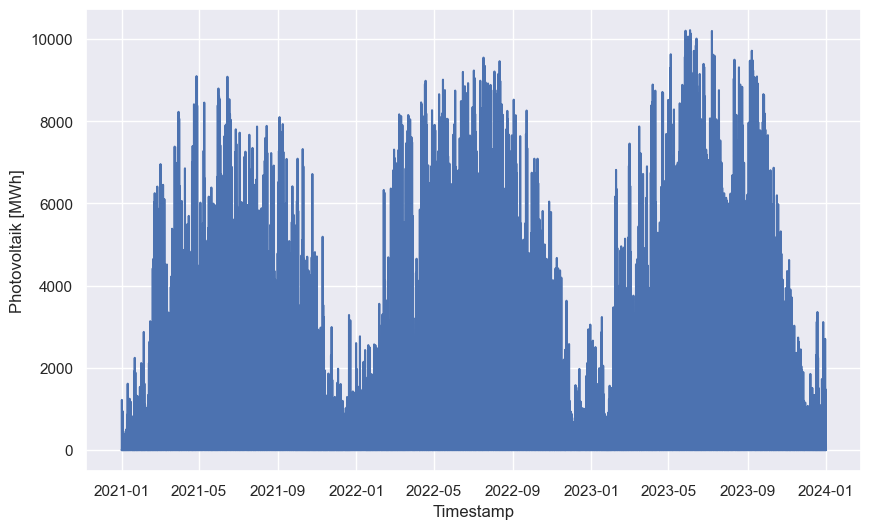

In [105]:
f, ax = plt.subplots(figsize =(10,6))
sns.lineplot(data=df_RGP_2, x='Timestamp', y='Photovoltaik [MWh]')

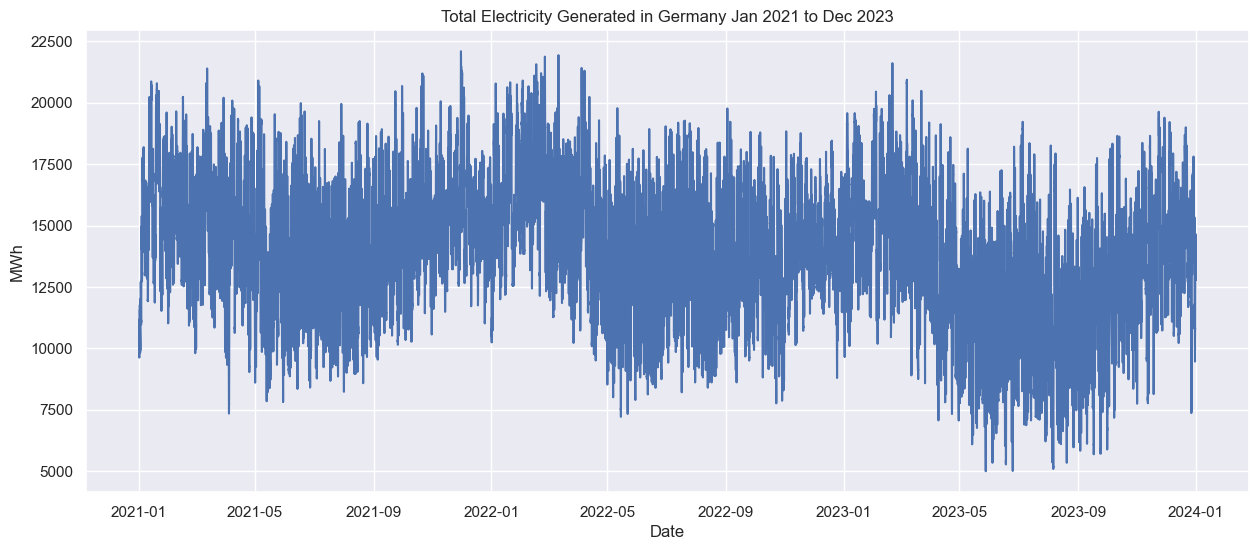

In [120]:
plt.figure(figsize=(15,6))
plt.plot(df_RGP_2.Timestamp, df_RGP_2.drop(columns='Timestamp').apply(sum, axis=1,))
plt.title('Total Electricity Generated in Germany Jan 2021 to Dec 2023')
plt.ylabel('MWh')
plt.xlabel('Date')
plt.show()

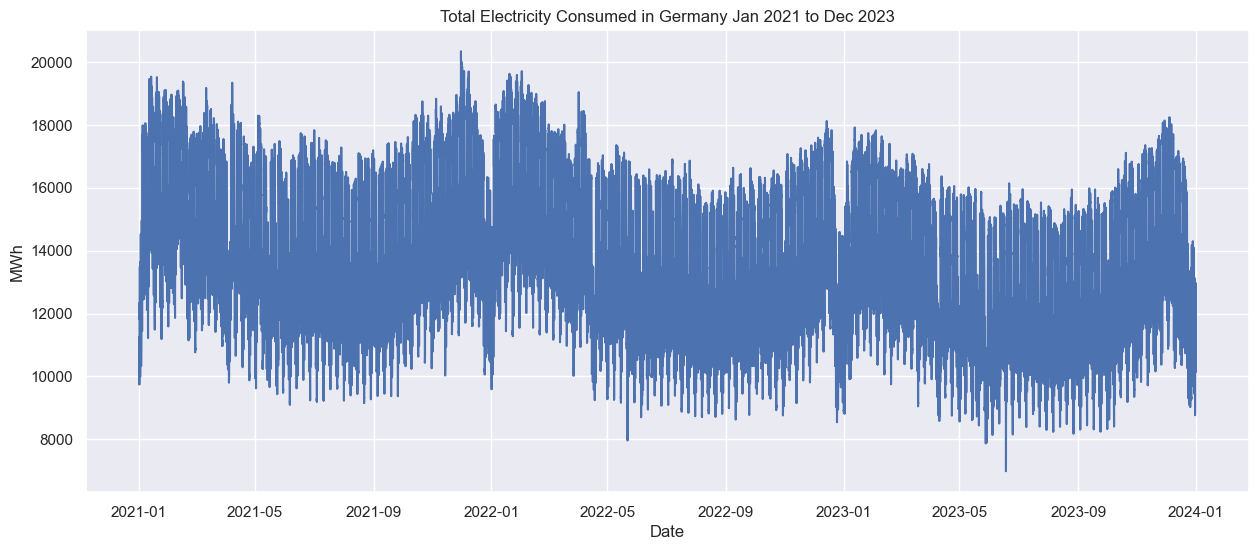

In [124]:
plt.figure(figsize=(15,6))
#plt.plot(df_RConP_2.Timestamp, df_RConP_2.drop(columns='Timestamp').apply(sum, axis=1,))
plt.plot(df_RConP_2.Timestamp, df_RConP_2['Total (Grid Load) [MWh]'])

plt.title('Total Electricity Consumed in Germany Jan 2021 to Dec 2023')
plt.ylabel('MWh')
plt.xlabel('Date')
plt.show()

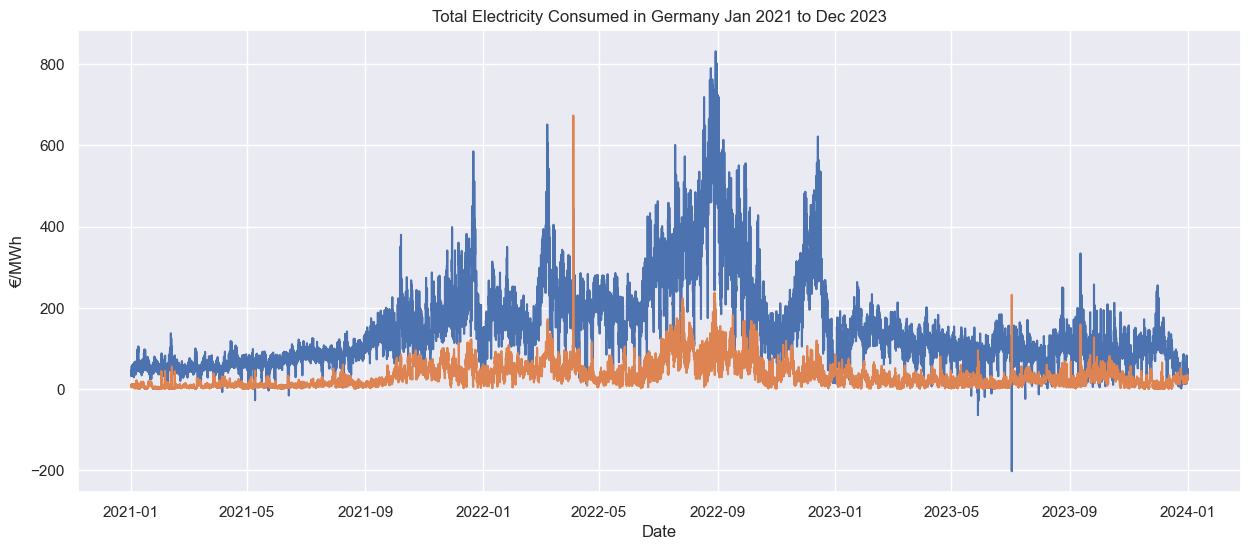

In [137]:
ax=plt.figure(figsize=(15,6))
plt.plot(df_MP_2.Timestamp, df_MP_2.drop(columns='Timestamp').apply(np.mean, axis=1))
plt.plot(df_MP_2.Timestamp, df_MP_2.drop(columns='Timestamp').apply(np.std, axis=1))
plt.title('Total Electricity Consumed in Germany Jan 2021 to Dec 2023')
plt.ylabel('€/MWh')
plt.xlabel('Date')
plt.show()


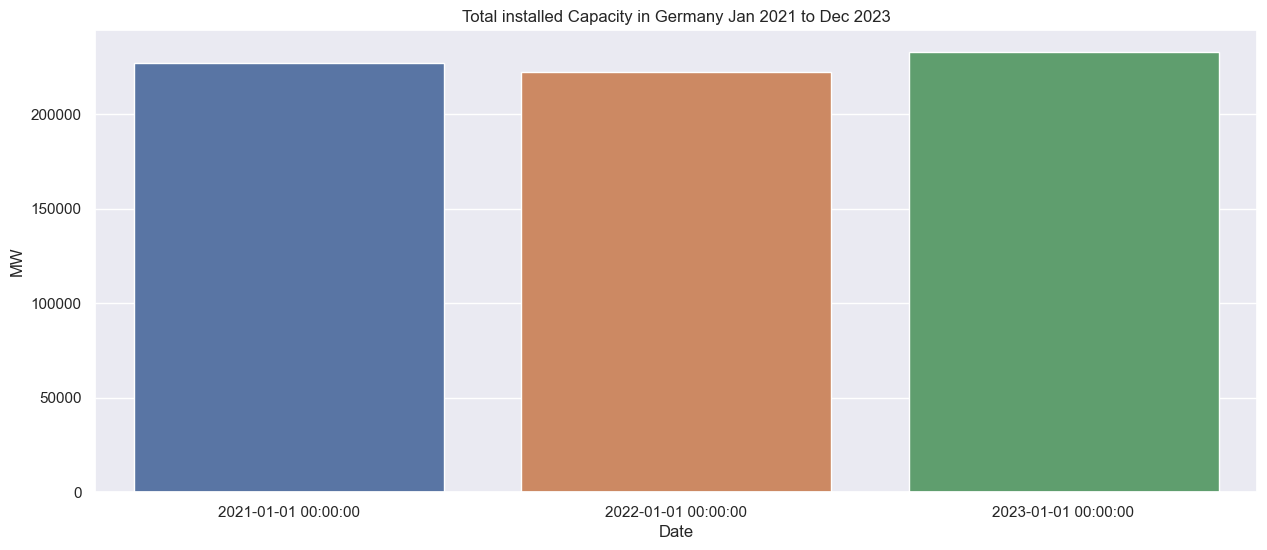

In [152]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x=df_IGC_2.Timestamp, y=df_IGC_2.drop(columns='Timestamp').apply(sum, axis=1))
plt.title('Total installed Capacity in Germany Jan 2021 to Dec 2023')
plt.ylabel('MW')
plt.xlabel('Date')
plt.show()

### Load
- save the cleansed data for use in the next step

In [156]:
df_IGC_2.to_pickle('../Data Cleansed/Installed_capacity.pkl')
df_RGP_2.to_pickle('../Data Cleansed/Real_generated_energy.pkl')
df_RConP_2.to_pickle('../Data Cleansed/Real_consumed_energy.pkl')
df_MP_2.to_pickle('../Data Cleansed/Market_price.pkl')

# Library versions

In [5]:
import sys
print("Python version:", sys.version)
!conda list

Python version: 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
# packages in environment at C:\Users\sager\anaconda3\envs\IADS:
#
# Name                    Version                   Build  Channel
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
blas                      1.0                         mkl  
bottleneck                1.3.7           py311hd7041d2_0  
brotli                    1.0.9                h2bbff1b_7  
brotli-bin                1.0.9                h2bbff1b_7  
brotli-python             1.0.9           py311hd77b12b_7  
bzip2                     1.0.8                h2bbff1b_5  
ca-certificates           2024.3.11            haa95532_0  
certifi                   2024.2.2        py311haa95532_0  
charset-normalizer        2.0.4              pyhd3eb1b0_0  
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
comm                      0.2.2              pyhd8ed1ab_0    conda-f